# Stackify
## You learn from my problems, one click at a time

Stackoverflow is a wonderful blogging platform, where users can post questions about specific technical fields, from science to computer science to social science. Other users can then comment and answers those questions.

Most users, though, use the platform for a very specific use: to ask a precise answer, or look for a specific answer. Sometimes, though, the best learning experience comes from unexpected places. Take the example of Wikipedia, where a user can jump from one article to the next using the hyperlinks provided for the important topics.

Stackify is a product that reproduces that experience by providing semantically close articles by recognizing the relevant key concepts of a given post.

### The results

Before going into the algorithm, let's see what the code can do for you

In [1]:
from Stackify_pipeline import main_function, user_input

Let's say that we are reading a physics article about python,

In [12]:
link = 'https://stackoverflow.com/questions/276761/exposing-a-c-api-to-python'

The function "user_input" gives us a summary of what we are currently reading,

In [13]:
index, question_id, title, body, field = user_input(link)
print('Summary of the question\n')
print(' - question id: {}\n'.format(question_id))
print(' - question title:\n{}\n'.format(title))
print(' - question body:\n {}\n'.format(body))
print(' - question topic: {}'.format(field))

Summary of the question

 - question id: 276761

 - question title:
Exposing a C++ API to Python

 - question body:
 I'm currently working on a project were I had to wrap the C++ classes with Python to be able to script the program. So my specific experience also involved embedding the Python interpreter in our program.
The alternatives I tried were:

Boost.Python
I liked the cleaner API produced by Boost.Python, but the fact that it would have required that users install an additional dependency made us switch to SWIG.
SWIG
SWIG's main advantage for us was that it doesn't require end users to install it to use the final program.

What have you used to do this, and what has been your experience with it?


 - question topic: python


From there, the function 'main_function' automatically identifies the relevant keywords and suggests the three most relevant articles for each of the keywords.

In [14]:
main_function(link)

python:

 - https://stackoverflow.com/questions/178199/python-can-i-have-a-list-with-named-indices
 - https://stackoverflow.com/questions/1211806/python-high-precision-time-sleep
 - https://stackoverflow.com/questions/2589711/find-full-path-of-the-python-interpreter


program:

 - https://stackoverflow.com/questions/44851668/how-can-i-find-out-which-module-a-name-is-imported-from
 - https://stackoverflow.com/questions/5630441/how-do-rpy2-pyrserve-and-pyper-compare
 - https://stackoverflow.com/questions/304883/what-do-i-use-on-linux-to-make-a-python-program-executable


api:

 - https://stackoverflow.com/questions/342729/how-should-i-learn-to-use-the-windows-api-with-python
 - https://stackoverflow.com/questions/5297448/how-to-get-md5-sum-of-a-string-using-python
 - https://stackoverflow.com/questions/1025029/how-to-use-win32-apis-with-python


use:

 - https://stackoverflow.com/questions/3580027/how-do-you-determine-which-backend-is-being-used-by-matplotlib
 - https://stackoverflow.com

Here is another example with a physics article,

In [3]:
link_physics = 'https://physics.stackexchange.com/questions/251867/what-manifold-is-spacetime'

In [19]:
index, question_id, title, body, field = user_input(link_physics)
print('Summary of the question\n')
print(' - question id: {}\n'.format(question_id))
print(' - question title:\n{}\n'.format(title))
print(' - question body:\n {}\n'.format(body))
print(' - question topic: {}'.format(field))

(7262,
 251867,
 'What manifold is spacetime?',
 'In General Relativity, spacetime is a $4$-dimensional manifold with one Lorentzian metric tensor defined on it. In the Special Relativity case what manifold is spacetime is quite clear: it is essentially $\\mathbb{R}^4$ endowed with the metric tensor $\\eta_{\\mu\\nu}=\\operatorname{diag}(-1,1,1,1)$.\nOn the other hand, on General Relativity I can\'t understand exactly what manifold spacetime is. I\'ll try to make my point clearer. Some people say: "you can\'t know this beforehand, the Einstein Field Equations are the source of this information". Now, the Einstein equations are equations for the metric tensor, not for the manifold (this wouldn\'t even make sense).\nBut the metric tensor is a tensor field. It is a function defined on spacetime. It only makes sense talking about it, if we know beforehand its domain!\nThe equation itself is one differential equation for functions defined on $M$, how can we work with those function, if the 

In [4]:
main_function(link_physics)

manifold:

 - https://physics.stackexchange.com/questions/92741/what-is-the-geometrical-interpretation-of-ricci-tensor
 - https://physics.stackexchange.com/questions/123725/what-kind-of-manifold-can-be-the-phase-space-of-a-hamiltonian-system
 - https://physics.stackexchange.com/questions/93627/are-conformal-killing-and-homothetic-vector-fields-the-same-in-pseudo-riemannia


define:

 - https://physics.stackexchange.com/questions/128026/how-to-understand-the-definition-of-vector-and-tensor
 - https://physics.stackexchange.com/questions/123097/units-of-a-discrete-fourier-transform
 - https://physics.stackexchange.com/questions/158890/is-there-a-physical-interpretation-of-a-tensor-as-a-vector-with-additional-quali


equation:

 - https://physics.stackexchange.com/questions/41138/what-is-the-physical-meaning-of-the-action-in-lagrangian-mechanics
 - https://physics.stackexchange.com/questions/71611/maxwells-equation-from-electromagnetic-lagrangian
 - https://physics.stackexchange.com/questi

## The algorithm

The complete pipeline is composed of various parts. Here are the steps that will be taken for data collection and processing,
 - We first build a database of data from Stackoverflow, which we collect using the web API. The data includes over 40,000 entries each containing the title post, the question, the question id, and the link to the question. 
 - The data processing step consists in removing stop words, stemming and lemmatizing the raw text data.
 - We need to extract additional features which will include the article keywords as well as semantic distances. For this step, we employ TextRank and Word2Vec.

Once we have built our data base of Stackoverflow articles, we can actually execute our program. Here are the steps that the programs takes with a user input,

 - The user will provide the URL of the Stackoverflow post being read.
 - Based on the URL, the algorithm will read the text, identify the semantically relevant keywords, and based on the database, will calculate which other article is most closely related to each keyword.
 - The output will be a list of the keywords along with the link to the post most relevant.
 - The user can then select a keyword to follow-up on by inputting the link into the algorithm once again.

## The data

The data contains 40,000 entries and was collected through the StackExchange web API. The API has a limit of 10,000 requests per day and up to 100 points per requests. Not using the API would limit the scraping rate to 300 requests per day.

For our collection, we included the title of the post, the actual question, the link to the post, the question ID, the question tags and the field (physics, biology or python).

In [ ]:
raw_data = pickle.load(open('iterative_scraping_Stackoverflow.pkl', "rb" ))

In [17]:
raw_data

,id,tags,title,body,link,type,field
0,77587,[botany],Examples of plant families that contain specie...,<p>The most classic example if you want to win...,https://biology.stackexchange.com/questions/77...,answers,biology
1,77587,[botany],Examples of plant families that contain specie...,"<p>The <a href=""https://en.wikipedia.org/wiki/...",https://biology.stackexchange.com/questions/77...,answers,biology
2,77587,[botany],Examples of plant families that contain specie...,"<p>Both the <a href=""https://en.wikipedia.org/...",https://biology.stackexchange.com/questions/77...,answers,biology
3,77371,"[evolution, sex]",Are there lifeforms that have more than 2 sexes?,<p>There exists something like multiple sexes ...,https://biology.stackexchange.com/questions/77...,answers,biology
4,77516,"[nomenclature, research-process]",How a Name is Selected for Binomial Nomenclature,<p>Your question covers a whole field of resea...,https://biology.stackexchange.com/questions/77...,answers,biology
5,77533,"[species-identification, species, herpetology]",What kind of snake is this,"<p>It looks like an <a href=""http://www.virgin...",https://biology.stackexchange.com/questions/77...,answers,biology
6,77587,[botany],Examples of plant families that contain specie...,<p>Fungi are not plants and you've tagged this...,https://biology.stackexchange.com/questions/77...,answers,biology
7,77265,"[genetics, terminology, psychiatry]",Is there logic in this sentence? &quot;Authors...,"<p>Yes, the statement in the news article is n...",https://biology.stackexchange.com/questions/77...,answers,biology
8,77371,"[evolution, sex]",Are there lifeforms that have more than 2 sexes?,"<p>It depends on just what you mean by ""requir...",https://biology.stackexchange.com/questions/77...,answers,biology
9,77405,"[evolution, zoology, sexual-reproduction]","Among primates, is it true that homosexual beh...","<p>First Antonio Pardo is not a biologist, he ...",https://biology.stackexchange.com/questions/77...,answers,biology


The cleaned data now looks like

In [18]:
data = pickle.load(open('iterative_scraping_Stackoverflow_processed.pkl', "rb" ))

In [19]:
data

,id,tags,title,body,link,type,field,mushed,w2v,keywords,relevant keywords,relevant keywords w2v
0,251867,"[general-relativity, spacetime, differential-g...",manifold spacetime,general relativity spacetime dimensional manif...,https://physics.stackexchange.com/questions/25...,questions,physics,manifold spacetimegeneral relativity spacetime...,"[4.712738037109375, -3.757232666015625, 1.2582...","[manifold, define, equation, metric, relativit...","[(equation, 0.5628598883952763), (define, 0.52...","[[0.30078125, 0.09423828, -0.088378906, -0.100..."
1,3496592,[python],conditional import module python,program want import simplejson json base wheth...,https://stackoverflow.com/questions/3496592/co...,questions,python,conditional import module pythonprogram want i...,"[1.070159912109375, -0.72698974609375, -0.6694...","[import, osys, json]","[(import, 0.5672811237985146)]","[[0.20605469, 0.22753906, -0.21386719, 0.06494..."
2,54690,"[molecular-biology, molecular-genetics, crispr]",role tracrrna crispr ca,understand crispr ca complex grna comprise tra...,https://biology.stackexchange.com/questions/54...,questions,biology,role tracrrna crispr caunderstand crispr ca co...,"[-0.189117431640625, 0.045711517333984375, 1.2...","[tracrrna, grna, dna, process]","[(process, 0.3767595957323574), (dna, 0.364213...","[[0.11035156, 0.25585938, 0.034179688, -0.0212..."
3,305178,"[general-relativity, energy, lagrangian-formal...",hamiltonian zero relativity,try understand something lagrangian hamiltonia...,https://physics.stackexchange.com/questions/30...,questions,physics,hamiltonian zero relativitytry understand some...,"[10.518692016601562, -1.5866641998291016, 1.72...","[hamiltonian, miss, theta new integration, int...","[(relativistic, 0.370380031742504), (relativit...","[[0.12890625, 0.0059814453, 0.33789062, 0.1137..."
4,52749,"[enzymes, enzyme-kinetics, kinetics]",lineweaver burk plot intercept,taking reciprocal side michaelis menten equati...,https://biology.stackexchange.com/questions/52...,questions,biology,lineweaver burk plot intercepttaking reciproca...,"[1.72137451171875, -1.548797607421875, -1.1798...","[dfrac, equation, plot, relationship]","[(equation, 0.4547917495061164), (plot, 0.4295...","[[0.30078125, 0.09423828, -0.088378906, -0.100..."
5,187231,"[special-relativity, time, metric-tensor, spee...",traveling time speed light,image axis represent time represent velocity p...,https://physics.stackexchange.com/questions/18...,questions,physics,traveling time speed lightimage axis represent...,"[3.3812789916992188, 1.350830078125, 0.2076339...","[time speed, chart, axis represent, second, di...","[(chart, 0.43134963934068427), (dimension, 0.4...","[[-0.14453125, -0.28320312, -0.4375, 0.0593261..."
6,32984,"[biochemistry, respiration]",doctor might give bicarbonate hco patient brea...,answer doctor assume rapid breathing body resp...,https://biology.stackexchange.com/questions/32...,questions,biology,doctor might give bicarbonate hco patient brea...,"[1.2608184814453125, 1.7418212890625, 1.529174...","[low, blood, patient breathing]","[(blood, 0.5263888417327167), (low, 0.29510892...","[[-0.33007812, 0.13769531, 0.19433594, -0.1059..."
7,139475,"[quantum-field-theory, gauge-theory, unitarity...",clarification need gauge fixing ghost,first time kind gauge fixing appear gupta bleu...,https://physics.stackexchange.com/questions/13...,questions,physics,clarification need gauge fixing ghostfirst tim...,"[0.9525604248046875, 2.7635116577148438, 0.969...","[need gauge fixing, term, appear, zeta, condit...","[(fix, 0.37890525585134543), (concept, 0.36400...","[[-0.023071289, -0.015563965, -0.083984375, 0...."
8,27778,"[dna, dna-sequencing, mutations, nucleic-acids...",inter codon mutation statistical analysis,looking statistical approach inter codon mutat...,https://biology.stackexchange.com/questions/27...,questions,biology,inter codon mutation statistical analysislooki...,"[0.361083984375, -0.7739410400390625, 1.426818...","[question, exam

## User input

The input to the algorithm is the blog post currently being read. For example, imagine reading this Stackoverflow post about importing Python packages, https://stackoverflow.com/questions/276761/exposing-a-c-api-to-python

In [2]:
import numpy as np
import pandas as pd
import pickle

from Stackify_pipeline import user_input
from Stackify_pipeline import get_keywords

from Data_overflow_processing import semantic_distance

from Stackoverflow_semantic_analysis import semantic_distance_to_avg
from Stackoverflow_semantic_analysis import semantic_distance_to_other_articles

import gensim

from Stackify_pipeline import main_function

performing pca on word data


<Figure size 500x500 with 1 Axes>

<Figure size 500x500 with 1 Axes>

<Figure size 601.625x500 with 1 Axes>

In [3]:
link2 = 'https://stackoverflow.com/questions/3496592/conditional-import-of-modules-in-python'
link = 'https://stackoverflow.com/questions/276761/exposing-a-c-api-to-python'
title, body, field, question_id = user_input(link)

In [22]:
data[data.loc[:, 'link'] == link].index.values[0]

20

The question we are currently reading is

In [4]:
print('Question id: {}\nField: {}\n'.format(question_id, field))
print('Title:   {}'.format(title))
print('\n')
print('Body:\n  {}'.format(body))

Question id: 276761
Field: python

Title:   Exposing a C++ API to Python


Body:
  I'm currently working on a project were I had to wrap the C++ classes with Python to be able to script the program. So my specific experience also involved embedding the Python interpreter in our program.
The alternatives I tried were:

Boost.Python
I liked the cleaner API produced by Boost.Python, but the fact that it would have required that users install an additional dependency made us switch to SWIG.
SWIG
SWIG's main advantage for us was that it doesn't require end users to install it to use the final program.

What have you used to do this, and what has been your experience with it?



In [5]:
main_function(link)

use: https://stackoverflow.com/questions/100003/what-are-metaclasses-in-python

python: https://stackoverflow.com/questions/49794432/how-to-setup-a-pipenv-python-3-6-project-if-os-python-version-is-3-5

program: https://stackoverflow.com/questions/5622976/how-do-you-calculate-program-run-time-in-python

boost: https://stackoverflow.com/questions/28830653/build-boost-with-multiple-python-versions

api: https://stackoverflow.com/questions/5852968/where-is-webdrivers-python-api-documentation



[('use',
  100003,
  'https://stackoverflow.com/questions/100003/what-are-metaclasses-in-python',
  1.0000000036783823),
 ('python',
  49794432,
  'https://stackoverflow.com/questions/49794432/how-to-setup-a-pipenv-python-3-6-project-if-os-python-version-is-3-5',
  0.9282039985029291),
 ('program',
  5622976,
  'https://stackoverflow.com/questions/5622976/how-do-you-calculate-program-run-time-in-python',
  0.5876463377481354),
 ('boost',
  28830653,
  'https://stackoverflow.com/questions/28830653/build-boost-with-multiple-python-versions',
  0.5249351390133108),
 ('api',
  5852968,
  'https://stackoverflow.com/questions/5852968/where-is-webdrivers-python-api-documentation',
  0.7050766698580805)]

## Keywords: TextRank and Word2vec

### TextRank

There exist several methods to obtain the keywords of a text. We have decided to rely on the TextRank algorithm to obtain the keywords. The TextRank algorithm [1] builds a graph out of the words in a text where each connection in the graph represents a relationship between words in the text. It is therefore possible to make a ranking on the importance of a word based on the number of connections each word has. Those words that have most connections are the keywords.


[1] Rada Mihalcea and Paul Tarau, **TextRank: Bringing Order into Texts**, Department of Computer Science University of North Texas

In our case, the TextRank algorithm came up with the following words,

In [4]:
keywords = get_keywords(link)[0]
for word in keywords:
    print(word)

python
program
api
use
boost
user install


### Word2Vec

Those words, however, are only the relevant keywords, but are not necessarily the semantically relevant keywords. In order for that, it is necessary to invole a word embedding model which is able to understand meaning of words.

It is quite costly and difficult to train a native word embedding model however, thus we are using a pre-trained model by Google, based on the 20-billion news articles data set.

The word embedding creates an abstract 300-dimensional vector space in which each word is associated a vector.  

Since we are using a pre-trained model, all we have to do is invoke it through the Gensim package.

In [ ]:
#path = './GoogleNews-vectors-negative300.bin.gz'
#model = gensim.models.KeyedVectors.load_word2vec_format(path, binary=True, limit = 1000000)
#pickle.dump(model, open('word2vec_model.pkl', "wb" ) )

Once loaded, we are pickling the model for future use.

In [5]:
model = pickle.load(open("word2vec_model.pkl", "rb" ))

For example, the vector for 'cat', is

In [17]:
model['cat']

array([ 0.0123291 ,  0.20410156, -0.28515625,  0.21679688,  0.11816406,
        0.08300781,  0.04980469, -0.00952148,  0.22070312, -0.12597656,
        0.08056641, -0.5859375 , -0.00445557, -0.296875  , -0.01312256,
       -0.08349609,  0.05053711,  0.15136719, -0.44921875, -0.0135498 ,
        0.21484375, -0.14746094,  0.22460938, -0.125     , -0.09716797,
        0.24902344, -0.2890625 ,  0.36523438,  0.41210938, -0.0859375 ,
       -0.07861328, -0.19726562, -0.09082031, -0.14160156, -0.10253906,
        0.13085938, -0.00346375,  0.07226562,  0.04418945,  0.34570312,
        0.07470703, -0.11230469,  0.06738281,  0.11230469,  0.01977539,
       -0.12353516,  0.20996094, -0.07226562, -0.02783203,  0.05541992,
       -0.33398438,  0.08544922,  0.34375   ,  0.13964844,  0.04931641,
       -0.13476562,  0.16308594, -0.37304688,  0.39648438,  0.10693359,
        0.22167969,  0.21289062, -0.08984375,  0.20703125,  0.08935547,
       -0.08251953,  0.05957031,  0.10205078, -0.19238281, -0.09

We can measure the semantic similarity between two words by measuring their cosine similarities. The cosine similarity is simply defined as the cosine between two vectors,

$$\rm{cosine~similarity}=\frac{\vec{word_1}\cdot\vec{word_2}}{|\vec{word_1}||\vec{word_1}|}=\cos{\theta}$$

where $\theta$ is the angle between the two vectors.

In [23]:
cat = model['cat']
dog = model['dog']

semantic_distance(cat, dog)

0.7609457

Now, we can check the difference between the word **cat** and the word **house**

In [24]:
house = model['house']

semantic_distance(cat, house)

0.26779082

It makes total sense that the similarity between house and cat is lower than that for cat and dog, since a house is not an animal.

By calculating an average word embedding for each of the questions, like so,

$$post = \frac{\sum_{words}model[words]}{\sum_{words}}$$

Using this concept, the average semantic meaning for the text is,

In [6]:
data = pickle.load(open('iterative_scraping_Stackoverflow_processed.pkl', "rb" ))

In [10]:
index = data[data.loc[:,'id'] == question_id].index.get_values()[0]
article_average = data.loc[index,'w2v']
article_average

array([ 1.43115234,  0.92327881, -2.85414124,  3.67681122, -4.52377224,
        1.80059814,  5.18981934, -0.80782795,  1.38024902,  5.90446949,
       -1.44403076, -5.27587891, -0.65759277,  1.98156738, -6.29821777,
        2.48974609,  0.66727209,  2.47045898,  1.09542847, -4.60583496,
       -0.63599396,  5.19911957,  0.09143066,  4.57414246,  0.38748169,
       -2.29849243, -5.92993164,  4.77798462,  1.70123291, -1.18859863,
       -1.47040558,  1.76025391, -2.08925247, -4.04143906,  0.49291992,
       -2.52258301,  2.6572876 ,  0.56848145,  2.61634064,  2.60391998,
        3.47973633,  0.63443756,  7.56448364,  2.6221199 , -1.712883  ,
       -7.4276123 , -4.73992157,  1.66318512, -0.73643494,  2.17603302,
       -2.02209473, -1.66214752,  1.94830322, -6.25686646,  1.04930115,
       -0.99091339, -1.07794189, -4.47229004,  1.33776855, -4.42079163,
        0.33921814, -1.84597778, -5.81445312, -0.72073364, -0.47381592,
        0.38372803, -4.56762695,  2.91445923, -2.16357422,  2.17

Knowing this average and its distance to each of the keywords in the article, we can output a ranking of the keywords in the article with respect to the average.

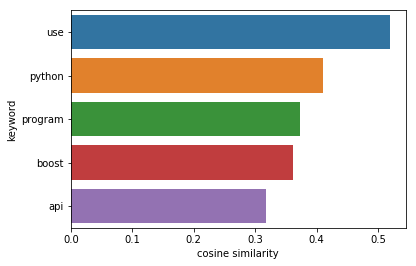

In [11]:
semantic_distance_to_avg(index)

Using a similar measure, we now define a similarity between the keywords and all other articles in the data base.

In [12]:
keyword = data.loc[index,'relevant keywords'][0][0]

load the w2v model
calculating the semantic distances to other articles


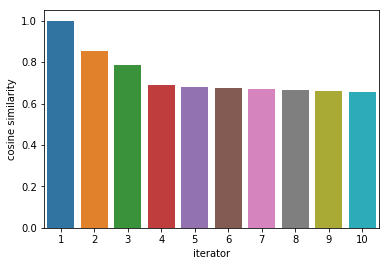

In [13]:
semantic_distance_to_other_articles(keyword, question_id, field)

Now that we have acccess to the articles that are semantically most closely related to our keyword, it is easy to retrieve the one article that is semantically most closely related to our keyword 

In [7]:
main_function(link)

use: https://stackoverflow.com/questions/100003/what-are-metaclasses-in-python

python: https://stackoverflow.com/questions/49794432/how-to-setup-a-pipenv-python-3-6-project-if-os-python-version-is-3-5

program: https://stackoverflow.com/questions/5622976/how-do-you-calculate-program-run-time-in-python

boost: https://stackoverflow.com/questions/28830653/build-boost-with-multiple-python-versions

api: https://stackoverflow.com/questions/5852968/where-is-webdrivers-python-api-documentation



[('use',
  100003,
  'https://stackoverflow.com/questions/100003/what-are-metaclasses-in-python',
  1.0000000036783823),
 ('python',
  49794432,
  'https://stackoverflow.com/questions/49794432/how-to-setup-a-pipenv-python-3-6-project-if-os-python-version-is-3-5',
  0.9282039985029291),
 ('program',
  5622976,
  'https://stackoverflow.com/questions/5622976/how-do-you-calculate-program-run-time-in-python',
  0.5876463377481354),
 ('boost',
  28830653,
  'https://stackoverflow.com/questions/28830653/build-boost-with-multiple-python-versions',
  0.5249351390133108),
 ('api',
  5852968,
  'https://stackoverflow.com/questions/5852968/where-is-webdrivers-python-api-documentation',
  0.7050766698580805)]

In [1]:
link3 = 'https://physics.stackexchange.com/questions/251867/what-manifold-is-spacetime'

In [2]:
from Stackify_pipeline import main_function

In [3]:
main_function(link3)

manifold:

 - https://physics.stackexchange.com/questions/92741/what-is-the-geometrical-interpretation-of-ricci-tensor
 - https://physics.stackexchange.com/questions/123725/what-kind-of-manifold-can-be-the-phase-space-of-a-hamiltonian-system
 - https://physics.stackexchange.com/questions/93627/are-conformal-killing-and-homothetic-vector-fields-the-same-in-pseudo-riemannia


define:

 - https://physics.stackexchange.com/questions/128026/how-to-understand-the-definition-of-vector-and-tensor
 - https://physics.stackexchange.com/questions/123097/units-of-a-discrete-fourier-transform
 - https://physics.stackexchange.com/questions/158890/is-there-a-physical-interpretation-of-a-tensor-as-a-vector-with-additional-quali


equation:

 - https://physics.stackexchange.com/questions/41138/what-is-the-physical-meaning-of-the-action-in-lagrangian-mechanics
 - https://physics.stackexchange.com/questions/71611/maxwells-equation-from-electromagnetic-lagrangian
 - https://physics.stackexchange.com/questi